In [2]:
import matplotlib.pyplot as plt
import numpy as np 

from skpcp import PCP

## Example 1

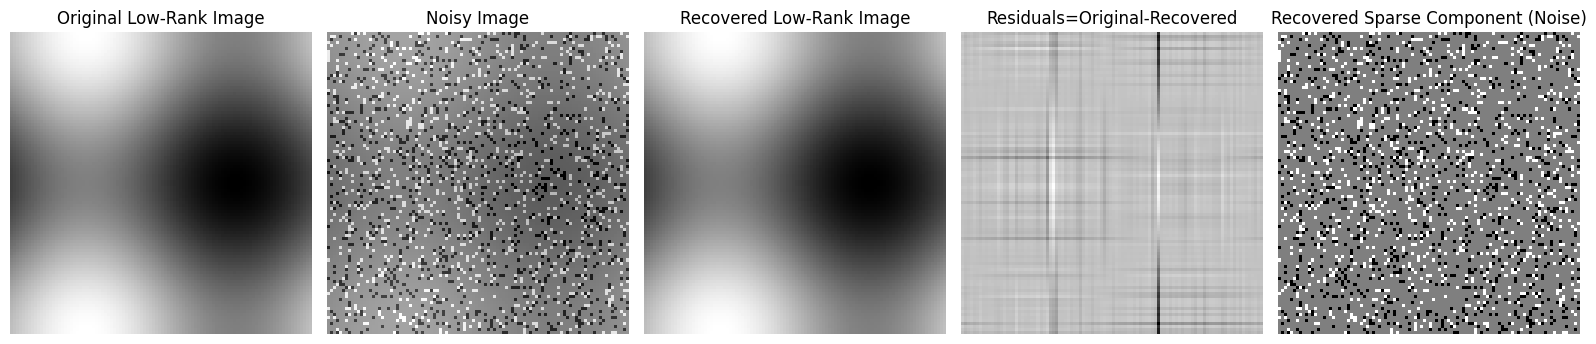

In [3]:
# Generate a synthetic image (low rank)
NROWS, NCOLS = 100, 100
NUM_OUTLIERS = 2000

X, Y = np.meshgrid(np.linspace(0, 1, NCOLS), np.linspace(0, 1, NROWS))
synthetic_image = np.sin(2 * np.pi * X) + np.cos(2 * np.pi * Y)

# Add sparse noise (random outliers)
sparse_noise = np.zeros_like(synthetic_image)
outlier_indices = np.random.choice(NROWS * NCOLS, size=NUM_OUTLIERS, replace=False)
sparse_noise.flat[outlier_indices] = np.random.choice([5, -5], size=NUM_OUTLIERS)

# Combine the low-rank image with the sparse noise
noisy_image = synthetic_image + sparse_noise
image_matrix = noisy_image.reshape(-1, noisy_image.shape[1])

# Apply principal component pursuit (PCP) to recover the low-rank and sparse components
pcp = PCP()
L, S = pcp.fit_transform(image_matrix)

L_image = L.reshape(noisy_image.shape)
S_image = S.reshape(noisy_image.shape)

# Plot the original, noisy, and recovered images
plt.figure(figsize=(16, 6))

plt.subplot(1, 5, 1)
plt.imshow(synthetic_image, cmap='gray')
plt.title('Original Low-Rank Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(L_image, cmap='gray')
plt.title('Recovered Low-Rank Image')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(L_image - synthetic_image, cmap='gray')
plt.title('Residuals=Original-Recovered')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(S_image, cmap='gray')
plt.title('Recovered Sparse Component (Noise)')
plt.axis('off')

plt.tight_layout()
plt.show()

## Example 2

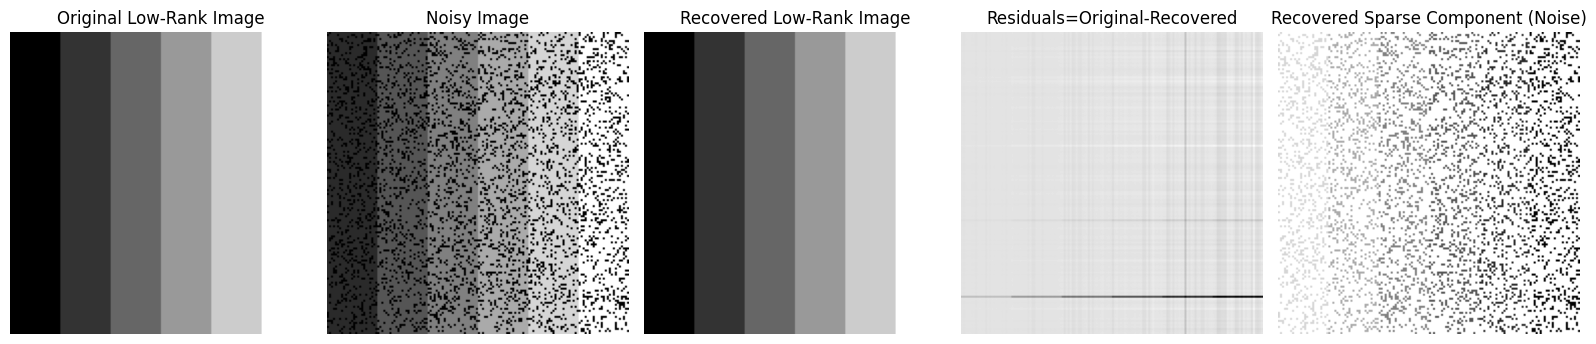

In [4]:
# generate low rank synthetic data
NROWS, NROWS = 100, 150
NUM_GROUPS = 6
P_MISSING = 0.2

data = []
for k in range(NUM_GROUPS):
    d = np.ones((NROWS, NROWS // NUM_GROUPS)) * (k + 1) * 10
    data.append(d)
data = np.hstack(data)

# DECIMATE 20% of data 
n1, n2 = data.shape
S = np.random.rand(n1, n2)
data_corrupt = data.copy()
data_corrupt[S < P_MISSING] = 0

# Apply PCP to recover the low-rank and sparse components

pcp = PCP()
L, S = pcp.fit_transform(data_corrupt)


plt.figure(figsize=(16, 6))
plt.subplot(1, 5, 1)
plt.imshow(data, cmap='gray')
plt.title('Original Low-Rank Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(data_corrupt, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(L, cmap='gray')
plt.title('Recovered Low-Rank Image')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(L - data, cmap='gray')
plt.title('Residuals=Original-Recovered')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(S, cmap='gray')
plt.title('Recovered Sparse Component (Noise)')
plt.axis('off')

plt.tight_layout()
plt.show()
